In [3]:
from platform import python_version
python_version()

'3.10.5'

In [4]:
import graph_tool.all as gt
import graph_tool.draw
import time
import pandas as pd

In [6]:
g = gt.Graph()
g.add_vertex(5)
for v in g.iter_edges():
    print(v)
g.add_edge(0, 1)


<Edge object with source '0' and target '1' at 0x10e3c9510>

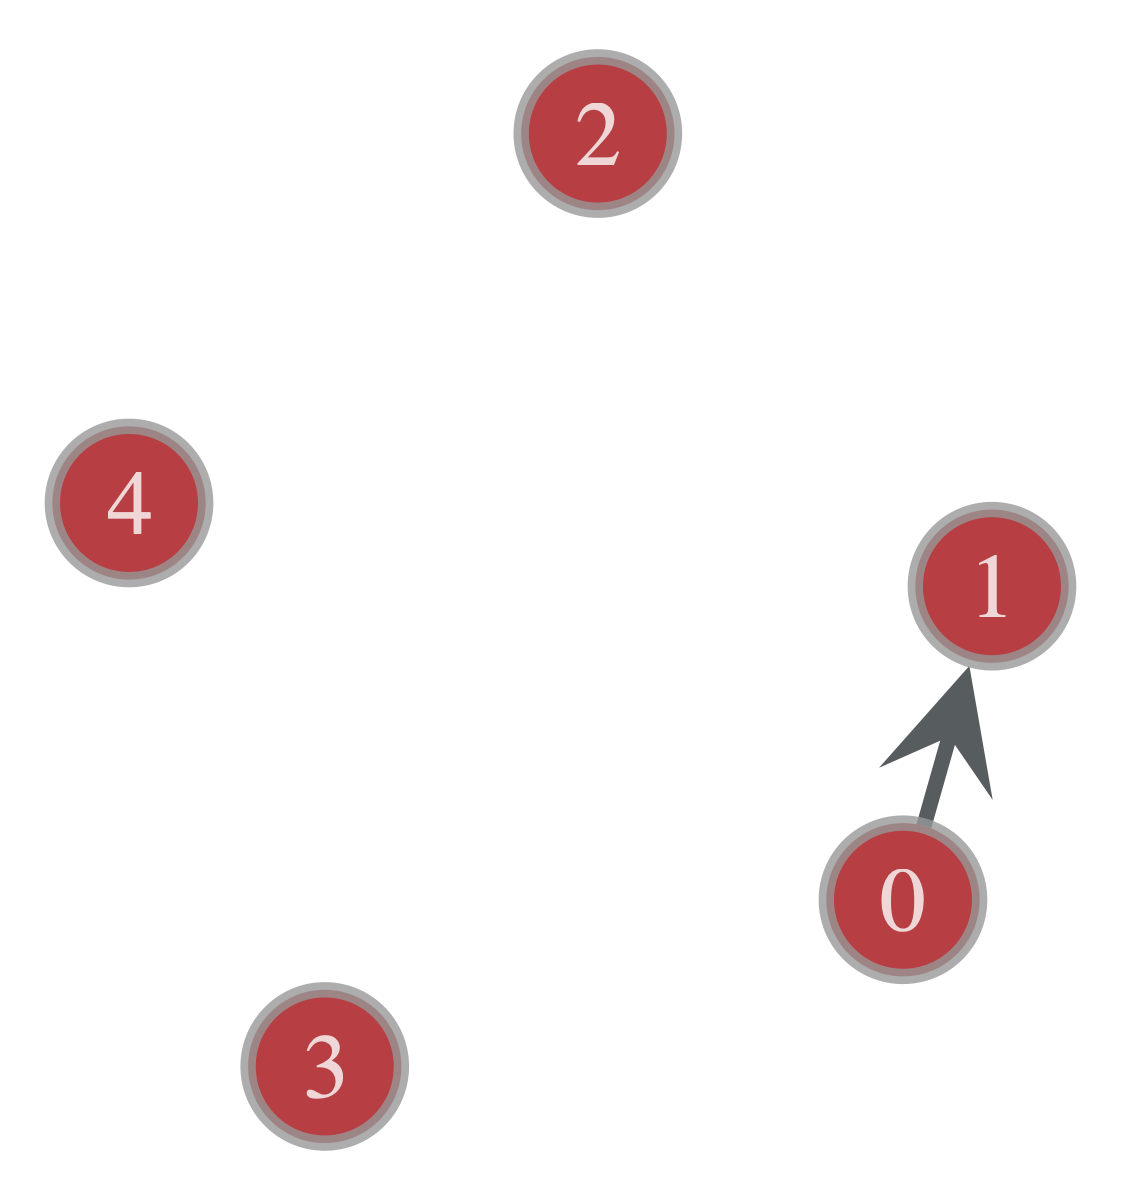

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x181837e50, at 0x1863374f0>

In [11]:
graph_tool.draw.graph_draw(g, vertex_text=g.vertex_index,)

In [13]:
ret = graph_tool.search.dijkstra_search(g, weight=None,source=0)

AttributeError: 'NoneType' object has no attribute 'value_type'

In [5]:
# update the original econ-mahindas file
df = pd.read_csv("../project/dataset/ENZYMES_g1/ENZYMES_g1_weighted.csv",delim_whitespace=True)
df.to_csv('../project/dataset/ENZYMES_g1/ENZYMES_g1_weighted_easy_graph.csv',index=False) 
df.head(100)

,2,1,1.1
0,3,1,1
1,4,1,1
2,1,2,1
3,3,2,1
4,4,2,1
...,...,...,...
95,22,23,1
96,24,23,1
97,36,23,1
98,21,24,1


In [7]:
g = gt.load_graph_from_csv(file_name="../project/dataset/ENZYMES_g1/ENZYMES_g1_weighted_easy_graph.csv", eprop_types=["int"], eprop_names=["weights"], 
                           csv_options={'delimiter': ',', 'quotechar': '"'})

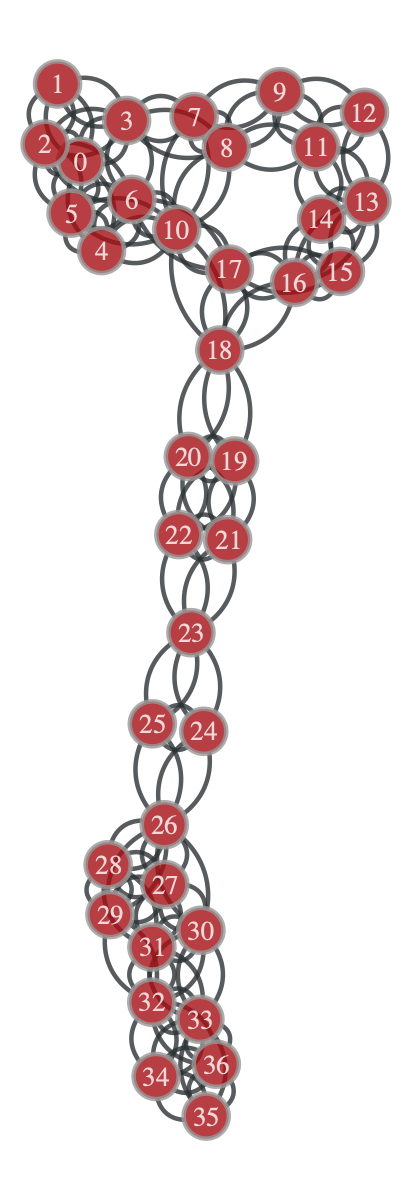

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x104f25ff0, at 0x1872e7730>

In [8]:
graph_tool.draw.graph_draw(g, vertex_text=g.vertex_index,ink_scale=0.8)

In [22]:
# check the weights of each edge
i = 0
for e in g.edges():
    if i >=20:
        break
    print(g.edge_properties["weights"][e])
    i += 1

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [11]:
ret = g.new_vertex_property("int")
eprop_dict = g.edge_properties["weights"]
start = time.time()
graph_ret = graph_tool.search.dijkstra_search(g, weight=eprop_dict,dist_map=ret,source=0)
end = time.time()
print("time to calculate dijkstra is:", end-start)
for i in range(37):
    print(ret[i])

time to calculate dijkstra is: 0.0009298324584960938
0
1
1
1
1
1
2
2
2
3
2
3
4
4
4
4
4
3
3
4
4
5
5
6
7
7
8
9
9
9
9
10
10
10
11
11
11


In [24]:
print(len(ret.get_array()))
print(g.num_edges())

37
168


In [12]:
# re
g2 = gt.load_graph_from_csv(file_name="../project/dataset/econ-mahindas/econ-mahindas.csv", csv_options={'delimiter': ' ', 'quotechar': '"'})

In [13]:
print(g2.num_vertices())
print(g2.num_edges())

1258
7683


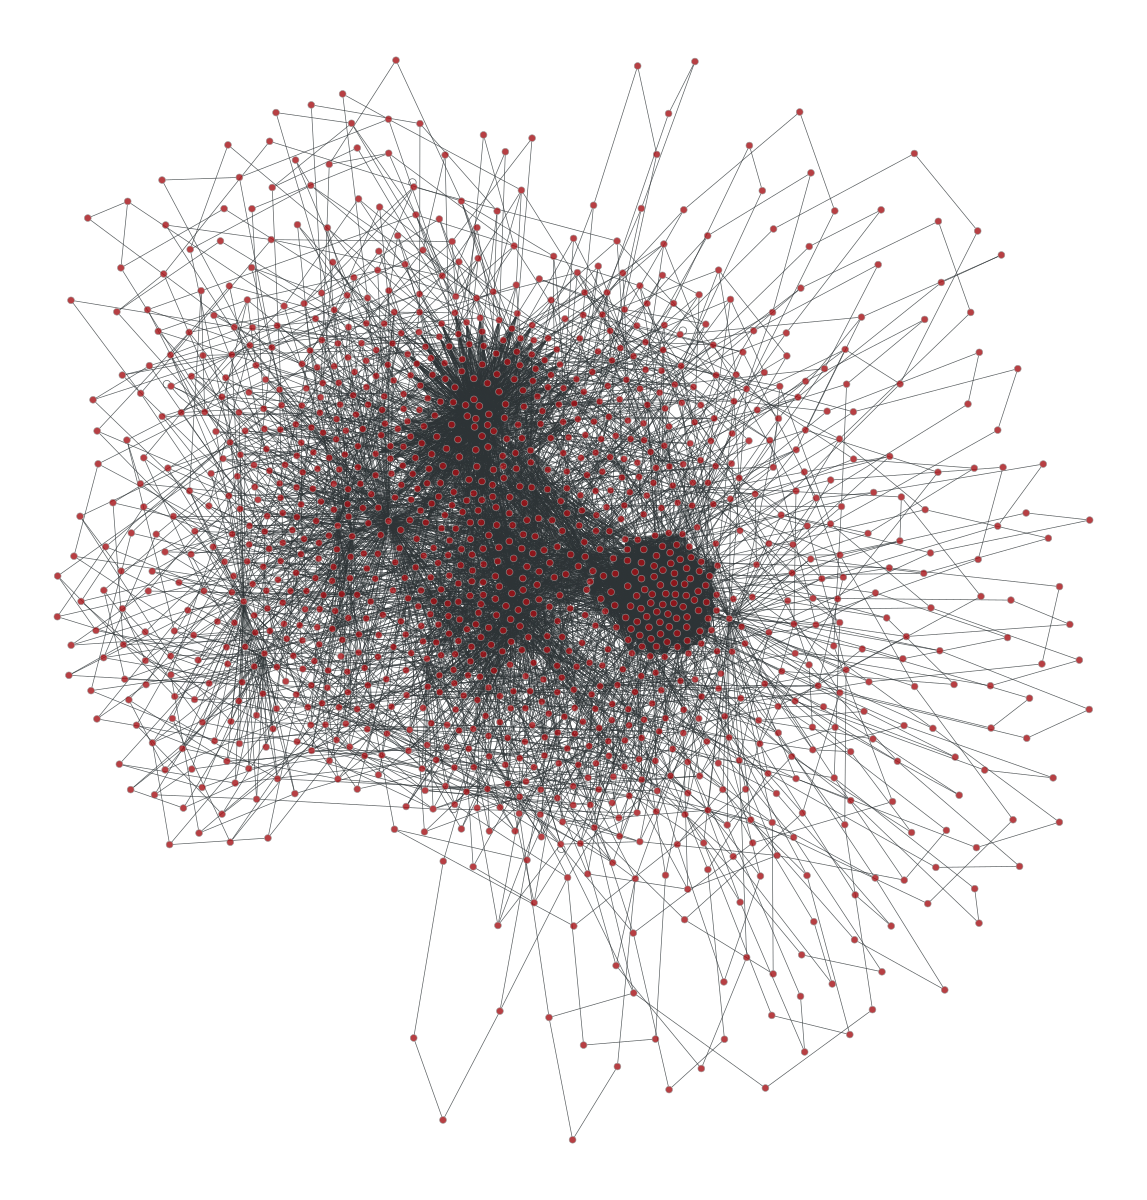

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x115948550, at 0x1115945e0>

In [6]:
graph_tool.draw.graph_draw(g2,ink_scale=0.7)

In [12]:
print(g2.get_edges())

[[   0    0]
 [   0 1212]
 [   0  637]
 ...
 [1257  175]
 [1257  152]
 [1257  635]]


In [14]:
# give each edge a weight of 1
eprop_dict=g2.new_edge_property("int")
for e in g2.edges():
    eprop_dict[e] = 1

In [ ]:
# check if each edge has weight 1
i = 0
for e in g2.edges():
    if i >=20:
        break
    print(eprop_dict[e])
    i += 1

In [19]:
ret = g2.new_vertex_property("int")
start = time.time()
graph_ret = graph_tool.search.dijkstra_search(g2, weight=eprop_dict,dist_map=ret,source=5)
end = time.time()
print("time to calculate dijkstra is:", end-start)

time to calculate dijkstra is: 0.023785114288330078


In [26]:
# update the original econ-mahindas file
df = pd.read_csv("../project/dataset/econ-mahindas/econ-mahindas.csv",delim_whitespace=True)
df.head()

,1258,1258.1,7682
0,1,1,-1.0
1,53,1,-1.0
2,105,1,-1.0
3,157,1,-1.0
4,158,1,-1.0


In [27]:
df['7682'] = 1
df.head(50)

,1258,1258.1,7682
0,1,1,1
1,53,1,1
2,105,1,1
3,157,1,1
4,158,1,1
5,159,1,1
6,160,1,1
7,161,1,1
8,162,1,1
9,163,1,1


In [28]:
# save as another csv file for use of easy graph
df.to_csv('../project/dataset/econ-mahindas/econ-mahindas-equal-weighted.csv',index=False) 

In [19]:
# load the third graph
g3 = gt.load_graph_from_csv(file_name="../downloaded_dataset/bio-CE-CX/bio-CE-CX.csv", eprop_types=["float"], eprop_names=["weights"],csv_options={'delimiter': ' ', 'quotechar': '"'})

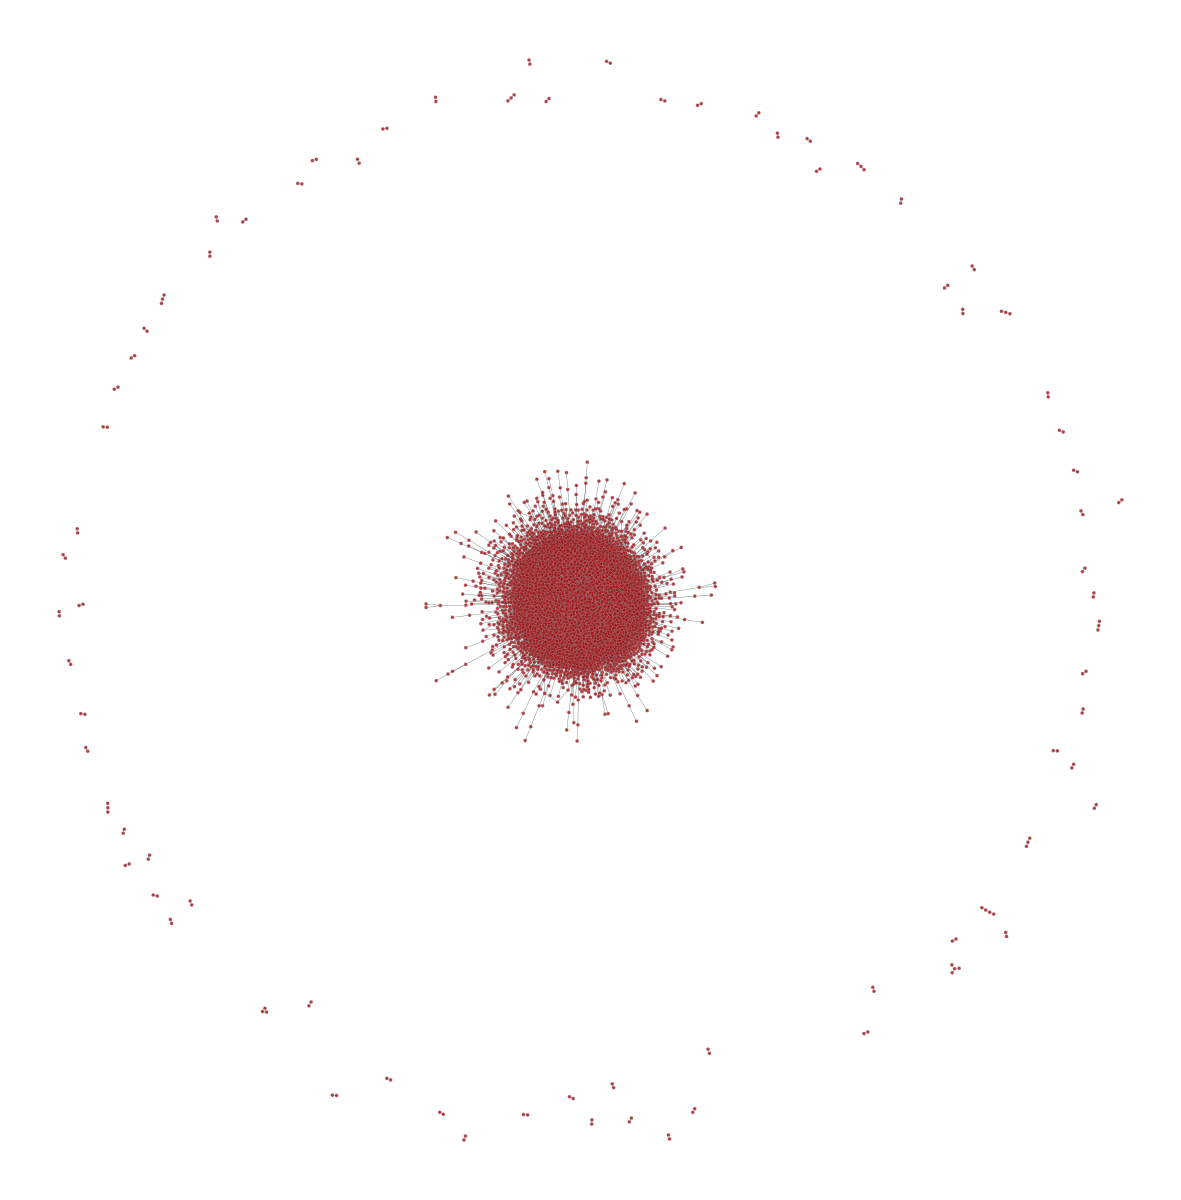

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x194a16bf0, at 0x1158c1630>

In [23]:
graph_tool.draw.graph_draw(g3,ink_scale=1.2)

In [24]:
print(g3.num_vertices())
print(g3.num_edges())

15229
245952


In [25]:
g3.list_properties()

name           (vertex)  (type: string)
weights        (edge)    (type: double)


In [26]:
# check if each edge has weights same as original csv file
i = 0
for e in g3.edges():
    if i >=20:
        break
    print(g3.edge_properties["weights"][e])
    i += 1

1.57336928633009
1.26855370701573
1.57251125183795
1.76481542620161
1.57868329912046
1.60242065238749
1.13567360691456
1.06237230288545
1.38810669625627
1.68848673921296
1.61890281646759
1.29382895222484
1.24569893539411
1.43574201651636
1.1175597519843
1.30581911011865
2.30853287671789
1.31835995458168
1.09803266794109
1.64225785978264


In [42]:
# calculating dijkstra_search from node 0 of g3
eprop_dict = g3.edge_properties["weights"]
ret = g3.new_vertex_property("int")
start = time.time()
graph_ret = graph_tool.search.dijkstra_search(g3, weight=eprop_dict,dist_map=ret,source=0)
end = time.time()
print("time to calculate dijkstra is:", end-start)

time to calculate dijkstra is: 0.6929972171783447
